## EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
train=pd.read_csv(r"C:\Users\HP\Downloads\titanic_train.csv")

In [13]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#missing data

In [17]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

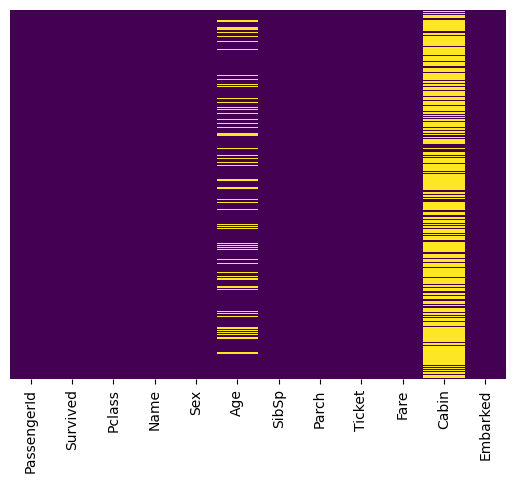

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis',cbar=False)

<Axes: >

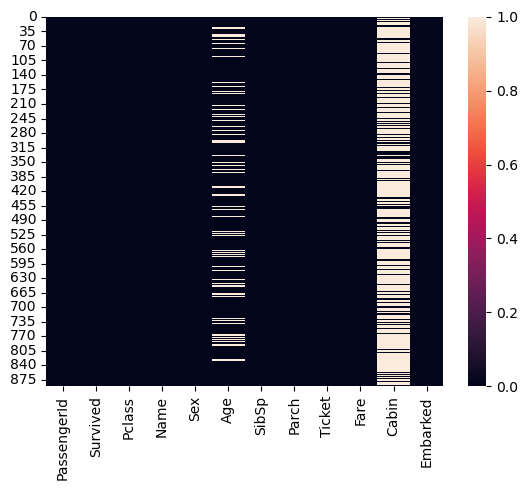

In [28]:
sns.heatmap(train.isnull())

<Axes: xlabel='Survived', ylabel='count'>

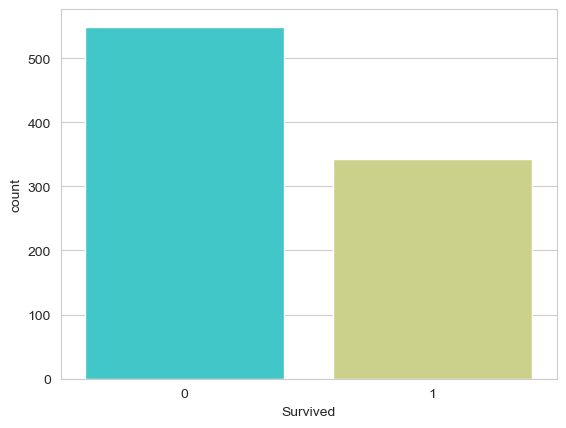

In [36]:
sns.set_style('whitegrid')
sns.countplot(data=train,x='Survived',palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

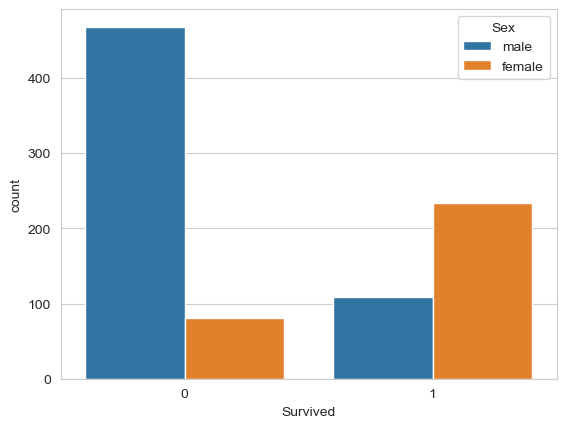

In [39]:
sns.countplot(data=train,x='Survived',hue='Sex')

In [46]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

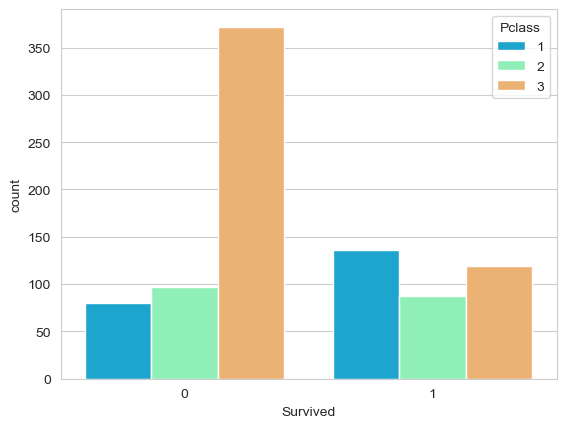

In [51]:
sns.countplot(data=train,x='Survived',hue='Pclass',palette='rainbow')

C:\Users\HP\AppData\Local\Temp\ipykernel_19908\2228875377.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

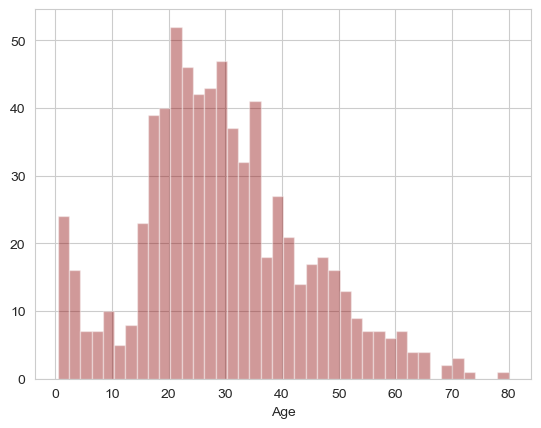

In [54]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
#it will give normal curve with littlee outliers

<Axes: xlabel='SibSp', ylabel='count'>

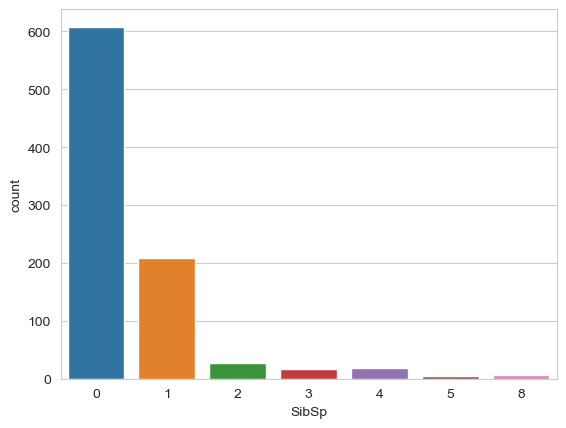

In [55]:
sns.countplot(x='SibSp',data=train)

<Axes: >

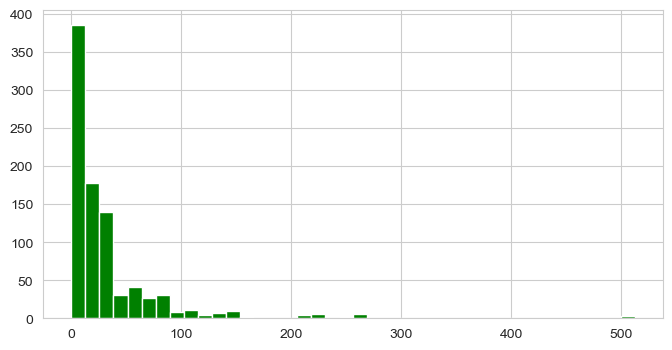

In [56]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [57]:
##data cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

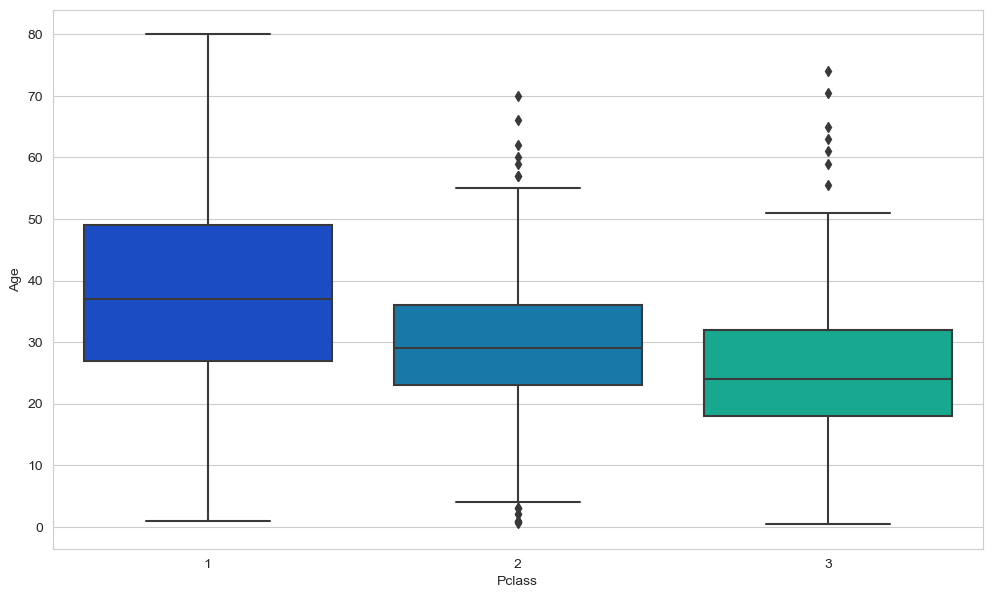

In [59]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [130]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
    elif Pclass == 2:
        return 29
    
    elif Pclass==3:
        return 24
    
    else:return Age
    
  

    
    

In [152]:
#now apply that function
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)


<Axes: >

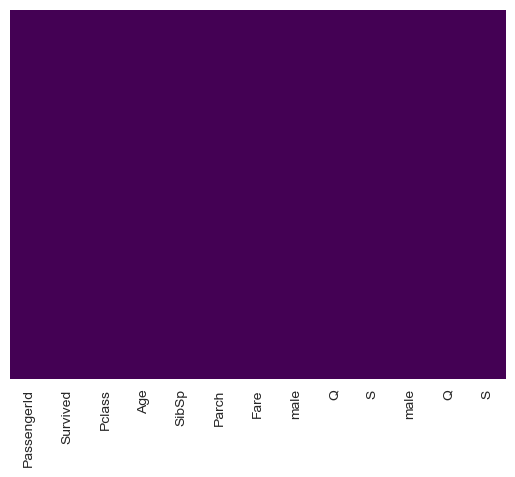

In [153]:
#now lets check that heat map again
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [154]:
#drop the cabin column and the row in embarked that in NaN

In [155]:

train.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [156]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,Age,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,Age,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1,1,0,1


In [157]:
train.dropna(inplace=True)

## Converting categorical features

In [158]:
pd.get_dummies(train['Embarked'],drop_first=True).head()
#removing not required columns

KeyError: 'Embarked'

In [138]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)

KeyError: 'Sex'

In [139]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex', 'Embarked', 'Name', 'Ticket'] not found in axis"

In [140]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,Age,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,Age,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


In [141]:
train=pd.concat([train,sex,embark],axis=1)

In [142]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,Age,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,Age,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1,1,0,1


## Building a logistic regression model

In [143]:

train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,3,24,1,0,7.2500,1,0,1,1,0,1
1,2,1,Age,1,0,71.2833,0,0,0,0,0,0
2,3,3,24,0,0,7.9250,0,0,1,0,0,1
3,4,1,Age,1,0,53.1000,0,0,1,0,0,1
4,5,3,24,0,0,8.0500,1,0,1,1,0,1


In [144]:

train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [145]:

from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [147]:

#Training and Predicting

In [148]:

from sklearn.linear_model import LogisticRegression

In [149]:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'Age'